In [63]:
import numpy as np
import tensorflow as tf

In [64]:
#Creating data
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

print(x_data)
print(y_label)

[-0.12200797  0.34901565  3.04970442  2.17018201  5.66378956  5.74608004
  7.72151072  9.23080204  8.64126997 11.16062437]
[-0.75152319  1.56792795  2.90898506  4.54353     3.8547943   4.11414287
  6.27564121  8.81947744  9.8919969  10.66452569]


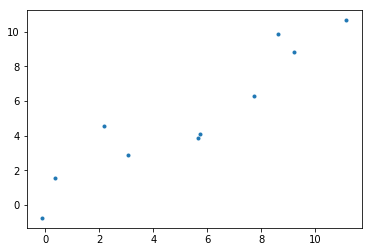

In [65]:
#Plotting data
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data, y_label, '.')

In [66]:
#Let's build a y = mx+b model

In [67]:
#Initializing m and b as random numbers. 
#Allocating them to a tf.Variable as they will be updated during training

m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

In [68]:
#Initializing the error at 0
loss = 0 #WARNING: This will not fit into the train = optimizer.minimize(error)

# preparing a pair of input - output data points
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    # defining the error function
    loss += (y - y_hat)**2 # NB: INT error becomes a tensor here since y_hat is a tensor from y_hat = m*x+b 

In [69]:
# let's define some hyperparameters
learning_rate = 0.01

In [70]:
type(loss)

tensorflow.python.framework.ops.Tensor

In [71]:
# Choosing the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#Indicate which tf object to minimize
train = optimizer.minimize(loss)

In [72]:
#Initializing the variables
init= tf.global_variables_initializer()

In [73]:
with tf.Session() as sess:
    
    sess.run(init) #Running the variable initialized
    
    epoch = 6
    
    for i in range(epoch):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

[  119823.5092886    -63308.01410636  -246439.53750132  -429571.06089628
  -612702.58429125  -795834.10768621  -978965.63108117 -1162097.15447613
 -1345228.67787109 -1528360.20126605]
[-137348.64254622]
[-17525.13325762]


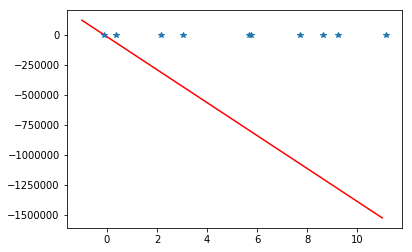

In [74]:
x_test = np.linspace(-1,11,10)

# y = mx + b
y_pred_plot = final_slope* x_test + final_intercept

print (y_pred_plot)
print (final_slope)
print (final_intercept)

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')